# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [2]:
# Use requests to get the HTML content of the webpage
response = requests.get('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
html_content = response.content

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Create a BeautifulSoup object from the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
# Find the table element on the page
table = soup.find('table')

# Extract the table headers (th) and table rows (tr) from the table
headers = [header.text.strip() for header in table.find_all('th')]
rows = [[data.text.strip() for data in row.find_all('td')] for row in table.find_all('tr')[1:]]


In [5]:
# Print the table headers and rows to check that the data was scraped correctly
print(headers)
print(rows)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a Pandas DataFrame from the table data
df = pd.DataFrame(rows, columns=headers)

# Print the DataFrame to check that the data was assembled correctly
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [7]:
# convert data to the appropriate data type
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   object        
 3   ls                1867 non-null   object        
 4   month             1867 non-null   object        
 5   min_temp          1867 non-null   object        
 6   pressure          1867 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
num_months

12

In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
num_sols

1867

In [35]:
# 3. What is the average low temperature by month?
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
print("Average low temperature by month:")
print(avg_temp_by_month)

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


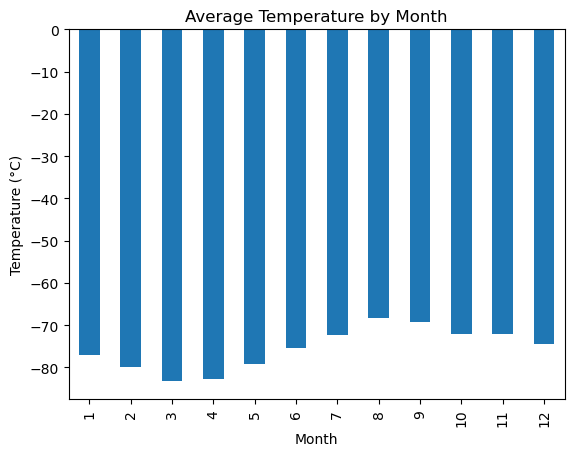

In [38]:
# Plot the average temperature by month
avg_temp_by_month.plot.bar(title='Average Temperature by Month', xlabel='Month', ylabel='Temperature (°C)')

plt.savefig('Avg_Temp_By_Month.png')

# Show the plot
plt.show()

In [25]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the average pressure by Martian month
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


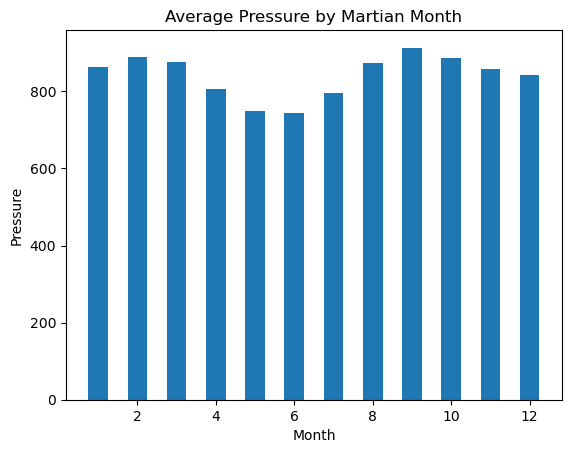

In [37]:
# Plot the average pressure by month
plt.bar(x=avg_pressure_by_month.index, height=avg_pressure_by_month.values, width=0.5)
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Pressure')

plt.savefig('Avg_Pressure_By_Month.png')

plt.show()

There are 686.65 Earth days in a Martian year.


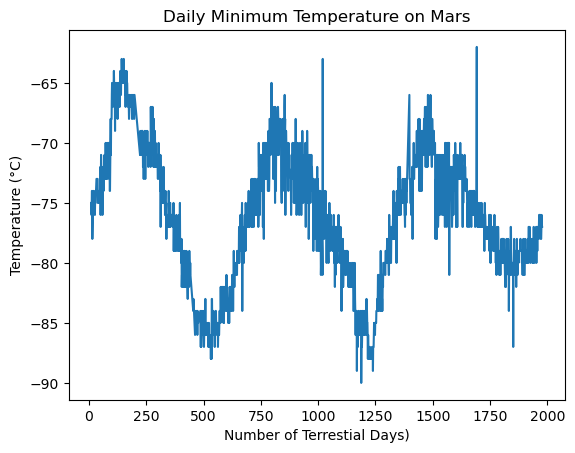

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year_days = 365.24 * 1.88
print(f"There are {martian_year_days:.2f} Earth days in a Martian year.")

# Plot the daily minimum temperature
plt.plot(df['sol'], df['min_temp'].astype(float))
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Terrestial Days)')
plt.ylabel('Temperature (°C)')

plt.savefig('Daily_Minimum_Temperature.png')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!


Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)


In [40]:
browser.quit()

NameError: name 'browser' is not defined